# Demonstrate Getting a Structure and Making an Image

This notebook will demonstrate getting a molecular structure here and rendering an image of it with PyMol.

Return to [the first page](index.ipynb) for the demonstration notebook [index](index.ipynb).

----


## Preparation

The intial parts to set up to send commands to PyMol are the same and so we'll define those as block of code we can prepend in front of special things to do.

In [25]:
init_block = '''#!/usr/bin/python

import sys, os

# pymol environment
moddir='/opt/pymol-svn/modules'
sys.path.insert(0, moddir)
os.environ['PYMOL_PATH'] = os.path.join(moddir, 'pymol/pymol_path')

import pymol
cmd = pymol.cmd
'''

With a block of code defined that we can use within this running notebook, we can now step through each of the basic steps to get a structure and make an image using it with PyMol.

## Retrieving a structure

Let's define a command to get a structuure. The command to run, Pymol's `fetch` command, is between the outer quotes because for now we just want to define what we intend to run.

In [26]:
cmd2run = "cmd.fetch('2zi0')"

Let's use the `init_block` now to combine it with the command to run and make a script to get a structure file.

In [27]:
script_txt = init_block + cmd2run
%store script_txt > script_f.py

Writing 'script_txt' (str) to file 'script_f.py'.


Let's run that script and get the structure.

In [28]:
!pymol -cq script_f.py

 ExecutiveLoad-Detail: Detected mmCIF


Let's see if that got the structure by running the next cell which shows the contents of that directory.

In [29]:
ls

1d66.png  1rpu.png  2az0.png  demo_colors.ipynb  script_f.py
1rpu.cif  2az0.cif  2zi0.cif  demo_fetch.ipynb   script_fs.py


Note that `1rpu.txt` is now among the list of files in the working directory.

## Making an image with the retrieved file

With a structure file in hand, we can use it to make an image.

The next few cells build on the example on the first notebook page to make an image. Mostly we are using the defaults for now.

In [30]:
cmds2run = '''cmd.load('2zi0.cif');cmd.zoom()
cmd.png('2zi0.png', 800, 800, dpi=300, ray=1)
'''

In [31]:
script_txt = init_block + cmds2run
%store script_txt > script_fs.py

Writing 'script_txt' (str) to file 'script_fs.py'.


In [32]:
!pymol -cq script_fs.py

 ExecutiveLoad-Detail: Detected mmCIF
 Ray: render time: 4.20 sec. = 857.2 frames/hour (4.20 sec. accum.).


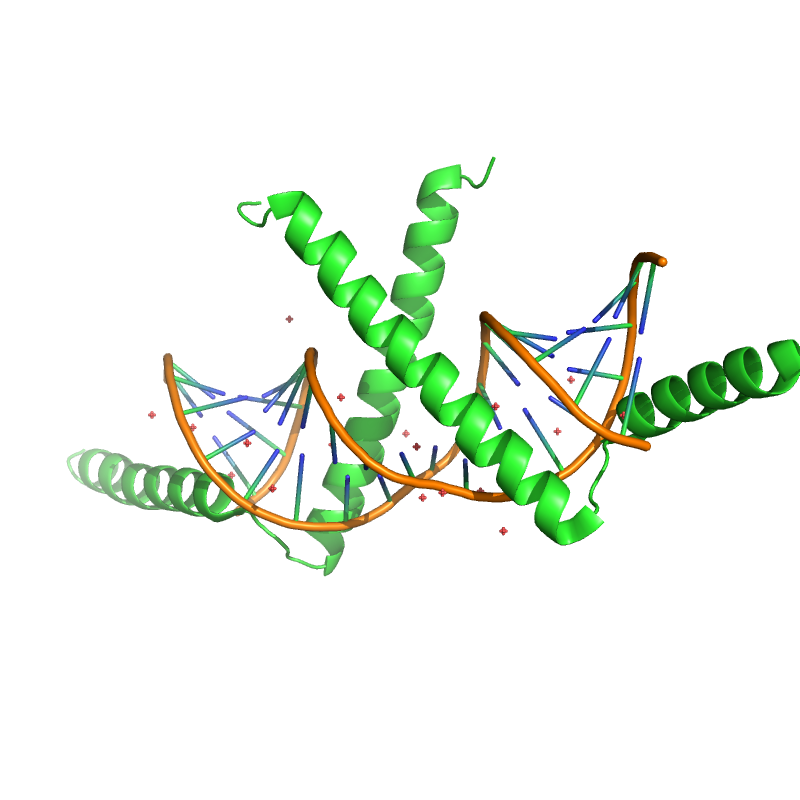

In [33]:
from IPython.display import Image
Image("2zi0.png")

## Putting it all together and customizing

Note that the steps above were done separately for the sake of making clear what was happening. It is possible to get a structure and render an image of it all at once. This section will demonstrate that as well as touch on how to customize things.



(I thought there would be a way in the Jupyter environment to skipping saving the commands to send to PyMol as an actual script. I tried `io.StringIO`, which works with text docstrings to send tables into Pandas), `io.BytesIO(text_2_save.encode())`, and even `filelike.to_filelike()` from [here](http://www.rfk.id.au/software/filelike/) and I wasn't able to find the magic combination to make it work without the file intermediate. If I ever get it working, this is where I'd put that in the growing collection of notebooks. Because it might help (or at least dissuade me from attempting more), one think I learned in the course of that: I think PyMol is examining the extension of the filename because sometimes when I add a final line line about making a `.png` file in the script it would say unsupported and show `.png` at the end even though `.png` was back much farther towards the start of the code of the final line I tried to feed in with: `a = filelike.to_filelike(text_2_save); !pymol -cq "{a.read()}"`.)

And so let's get a different structure and make the do some coloring and quality changes while customizing.

In [59]:
cmds2run = '''cmd.fetch('1d66');cmd.zoom()
cmd.set ("ray_opaque_background", 0)
cmd.bg_color ("white")
cmd.set ("cartoon_fancy_helices", 1)
cmd.set ("cartoon_side_chain_helper", "on")
cmd.hide ("everything", "all")
cmd.show ("cartoon", "all")
cmd.util.cbc()
cmd.show ("sphere", "metals")
cmd.png('1d66.png', 800, 800, dpi=300, ray=1)
'''

Brief rundown of some of those commands:

- You'll note that we don't include a `cmd.load()` like we did above in the two-step example. That is because by default, PyMol brings in a fetched molecule into the current environment as well. In the case of the above 'two-step' processing, each step was perfromed by a separate 'environment'. And so druing the second step the `cmd.load()` was used to bring in a previously fetched structure into the active environment at that time.

- `cmd.set ("ray_opaque_background", 0)` sets the image with a transparent background. Use `cmd.set ("ray_opaque_background", 1)` if you want opaque. (I would like to note that I found running the examples like above that the default is to produce an image with a transparent background. Curiously, I believe the default for the tpyical PyMol GUI launches with is the opposite in that it defaults where the background is opaque. For that reason, I suggest including an explicit assignmemt of this state.)

- `cmd.bg_color ("white")` sets the background color explicitly to white. 

- The `hide` and `show` commands are included so that only the cartoon representations are shown. You'll note the 'two-step' example at the start of this notebook produced an image with some red plus signs. We don't want that and so we hide everything and then turn on the typical cartoon representations.

- `cmd.util.cbc()` applies the [color by chain (cbc) utility command](https://pymolwiki.org/index.php/CBC) with the default settings. This results in each chain being color differently. This helps show this protein is a dimer bound to DNA.

- `cmd.show ("sphere", "metals")` sets the metals to display as spheres. The ions were hidden earlier along with everything else by the `hide` step.

Let's process those commands.

Writing 'script_txt' (str) to file 'script_o.py'.
 ExecutiveLoad-Detail: Detected mmCIF
 Ray: render time: 3.69 sec. = 976.2 frames/hour (3.69 sec. accum.).


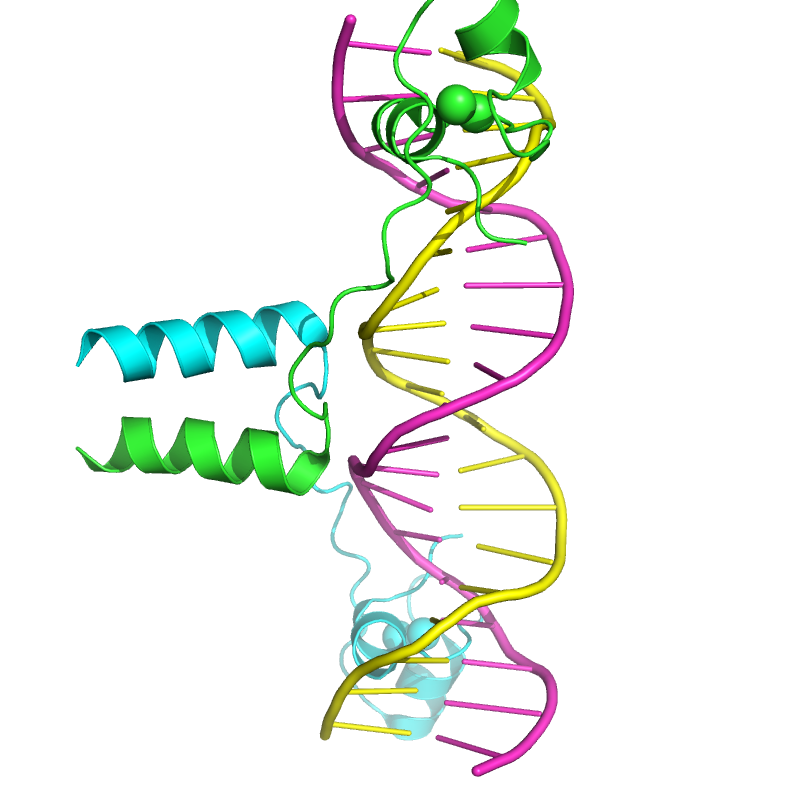

In [60]:
script_txt = init_block + cmds2run
%store script_txt > script_o.py
!pymol -cq script_o.py
from IPython.display import Image
Image("1d66.png")

Nice.  
However, there are some issues.

- The ions are colored differently because they are assigned a chain association and got colored per chain. Let's color those ions all the same color since [the structure 1d66 only contains one type of ion](https://www.rcsb.org/structure/1d66), specifically cadmium which is [common as a substitute for zinc in crystallography](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5505155/).

- It would be nice if both strands of the DNA were a single color since this protein is a DNA binding protein. That way we emphasize the ligand of the dimer is double-stranded DNA.

- The fog seems too drastic, covering the back of one of the strands of the DNA.

Let's edit our script to address those.

Writing 'script_txt' (str) to file 'script_o.py'.
 ExecutiveLoad-Detail: Detected mmCIF
 Ray: render time: 4.29 sec. = 838.7 frames/hour (4.29 sec. accum.).


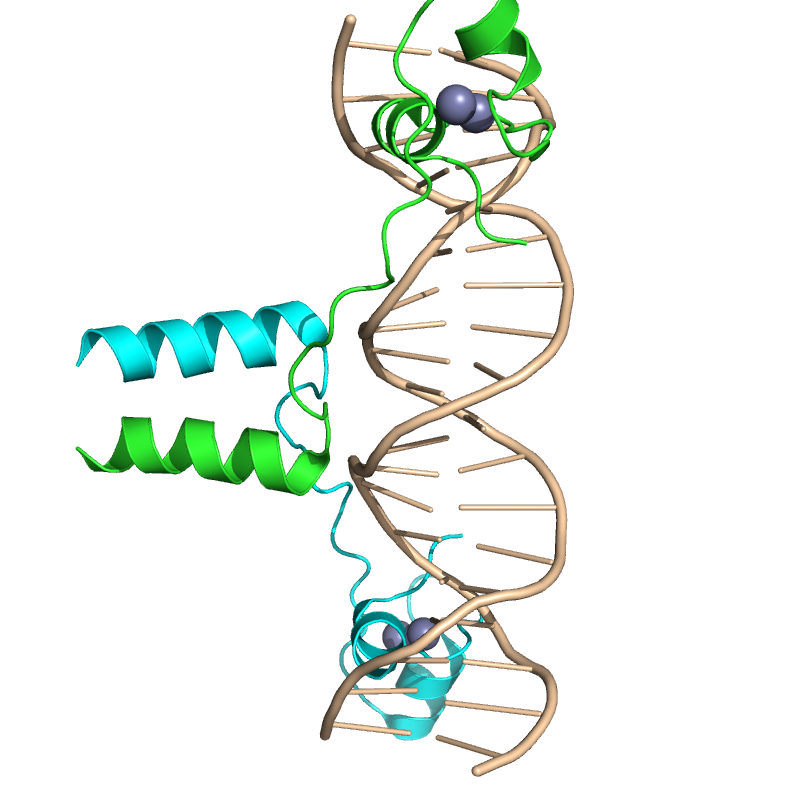

In [98]:
cmds2run = '''cmd.fetch('1d66');cmd.zoom()
cmd.set ("ray_opaque_background", 0)
cmd.bg_color ("white")
cmd.set ("cartoon_fancy_helices", 1)
cmd.set ("cartoon_side_chain_helper", "on")
cmd.hide ("everything", "all")
cmd.show ("cartoon", "all")
cmd.util.cbc()
cmd.show ("sphere", "metals")
def hex_to_rgb(value):
    #based on https://stackoverflow.com/a/214657/8508004
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
cmd.set_color ("ion_color", [*hex_to_rgb("#7D80B0")])
cmd.color ("ion_color", "metals")
cmd.color ("wheat","polymer.nucleic")
cmd.set ("fog_start", 0.70)
cmd.png('1d66improved.png', 800, 800, dpi=300, ray=1)
'''
script_txt = init_block + cmds2run
%store script_txt > script_o.py
!pymol -cq script_o.py
from IPython.display import Image
Image("1d66improved.png")

Improved.

See the [colors demo](demo_colors.py) for more on colors in PyMol.  
The [PyMol wiki Colors page](https://pymolwiki.org/index.php/Color_Values) has a nice list of ones that can be used and what PyMol uses by default for certain items. 

The [Jmol colors page](http://jmol.sourceforge.net/jscolors/) has a nice account of colors and some schemes commonly used in molecular visualization.